# Mini Lab 1: Logisitc Regression & SVMs

Authors:
* Robert Burigo
* Taylor Bonar
* Rashmi Patel
* Scott Englerth

For the purpose of this lab, the data has been reduced to only two genres of music to focus on differences and analyze further into the techniques we are utilizing.

In [10]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

#Loading in csv Spotify dataset
file_path = os.path.join(os.getcwd(), "SpotifyFeatures.csv")
df = pd.read_csv(file_path) # read in the csv file

df.head()

In [12]:
dfPopRock = df[((df["genre"]=="Pop") | (df["genre"]=="Rock"))]
dfPopRock.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107805,Pop,J. Cole,MIDDLE CHILD,2JvzF1RMd7lE3KmFlsyZD8,96,0.1490,0.837,213594,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984,4/4,0.463
107806,Pop,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913


In [13]:
dfPopRock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18658 entries, 107802 to 226507
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             18658 non-null  object 
 1   artist_name       18658 non-null  object 
 2   track_name        18658 non-null  object 
 3   track_id          18658 non-null  object 
 4   popularity        18658 non-null  int64  
 5   acousticness      18658 non-null  float64
 6   danceability      18658 non-null  float64
 7   duration_ms       18658 non-null  int64  
 8   energy            18658 non-null  float64
 9   instrumentalness  18658 non-null  float64
 10  key               18658 non-null  object 
 11  liveness          18658 non-null  float64
 12  loudness          18658 non-null  float64
 13  mode              18658 non-null  object 
 14  speechiness       18658 non-null  float64
 15  tempo             18658 non-null  float64
 16  time_signature    18658 non-null  

In [14]:
dfPopRock = dfPopRock[dfPopRock.columns[dfPopRock.columns.isin(['genre', 'popularity','acousticness', 'danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence'])]]
dfPopRock.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
107802,Pop,99,0.0421,0.726,190440,0.554,0.000000,0.1060,-5.290,0.0917,169.999,0.335
107803,Pop,99,0.1630,0.833,149520,0.539,0.000002,0.1010,-7.399,0.1780,99.947,0.385
107804,Pop,100,0.5780,0.725,178640,0.321,0.000000,0.0884,-10.744,0.3230,70.142,0.319
107805,Pop,96,0.1490,0.837,213594,0.364,0.000000,0.2710,-11.713,0.2760,123.984,0.463
107806,Pop,97,0.5560,0.760,158040,0.479,0.000000,0.0703,-5.574,0.0466,89.911,0.913


In [15]:
from sklearn.model_selection import ShuffleSplit

In [20]:
# we want to predict the X and y data as follows:
if 'genre' in dfPopRock:
    y = dfPopRock['genre'].values # get the labels we want
    del dfPopRock['genre'] # get rid of the class label
    X = dfPopRock.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

====Iteration 0  ====
accuracy 0.652465166130761
confusion matrix
 [[1339  542]
 [ 755 1096]]
====Iteration 1  ====
accuracy 0.6594319399785638
confusion matrix
 [[1329  574]
 [ 697 1132]]
====Iteration 2  ====
accuracy 0.4847266881028939
confusion matrix
 [[   0 1923]
 [   0 1809]]


## Logistic Regression Model

In [28]:
from sklearn.preprocessing import StandardScaler

In [27]:
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,dfPopRock.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.7759914255091104
[[1451  472]
 [ 364 1445]]
popularity has weight of -0.9948948069349446
speechiness has weight of -0.8691154055329502
danceability has weight of -0.778399310428123
loudness has weight of -0.7441935630743489
acousticness has weight of -0.1213093367005374
tempo has weight of -0.07617109248363631
liveness has weight of -0.008116267271811289
instrumentalness has weight of 0.048101851796609835
duration_ms has weight of 0.17740966578722633
valence has weight of 0.4366073240852141
energy has weight of 0.6344526262065842


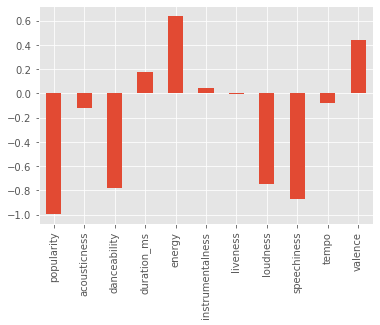

In [29]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=dfPopRock.columns)
weights.plot(kind='bar')
plt.show()

### Weights of Logisitic Regression

The following attributes were weighted as important to classify between Pop and Rock songs:
* Popularity -- in favor of Pop
* Danceability -- in favor of Pop
* Energy -- in favor of Rock
* Loudness -- in favor of Pop
* Speechiness -- in favor of Pop
* Valence -- in favor of Rock

#### Popularity
Nowadays, popularity in rock has declined from the 80s and early 2000's alternative rock scene as Pop has risen to more mainstream radio station and spread. 

#### Danceability
Pop is designed for a broader audience, and has a formulated structure to be easily listenable, singable, and generally, danceable. As Spotify defines danceability as:
* how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

We can conclude that the fomulaic structure of Pop pinpoints a greater average and helps classify it much easier.


#### Energy
Rock, although it has a variability of what it can be, tends to have a faster structure and higher tempo speeds than Pop.

#### Loudness
Spotify classifies Loudness as:
* The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

One may think that Rock would be the favored for loudness, but for the umbrella hanging term of Rock, there is a large variety of songs. As Spotify takes an average for songs, we can conclude that due to the variability of the Rock genre vs. Pop genre, that the consistency of Pop's loudness would be much more identifying than Rock.

#### Speechiness
As stated in Danceability, the fomulaic structure of Pop pinpoints a greater average and helps classify it much easier. Pop songs are designed for a broader audience and tend to have simple speech patterns and repeated choruses for the audience to remember and easily sing along.

#### Valence
We were surprised to see Valence skew towards identifying and classifying Rock songs rather than Pop songs. One possibly theory we have is a nostalgic factor of potential sub-genres of Rock such as Classic Rock, where it invokes memories of younger days.


## SVM Model

In [30]:

# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model 
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.7976956055734191
[[1498  425]
 [ 330 1479]]


In [37]:

# look at the support vectors
print(svm_clf.support_vectors_)
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )


[[-0.25440559  1.0578706   2.00528119 ... -0.59291468 -0.8283551
   1.32890284]
 [ 0.48111698 -0.79494697  0.0639829  ...  0.08682053 -0.6162087
   0.14300341]
 [ 0.23594279 -0.8013964  -0.37349278 ... -0.35015211 -0.47639589
  -0.29022185]
 ...
 [ 0.23594279  0.1063807  -0.04538602 ... -0.60120414  0.92142235
   1.58271158]
 [ 0.35852989 -0.82950317 -0.2094394  ... -0.42238878 -0.12316284
  -1.23106457]
 [ 1.46181376 -0.83707408 -0.84514623 ... -0.46975709  0.48635353
   0.16925949]]
(7798, 11)
(7798,)
[3899 3899]


### Support Vector Analysis of Linear SVM
When comparing the Support Vectors for a Linear SVM against the Logistic Regression's weights, we can see that they share the same shapes and roughly almost the same values. This shows that geometrically and statistically speaking, our SVM and Logisitic Regression models share the same defining features to classify a song as pop or rock.

accuracy: 0.7751875669882101
[[1442  481]
 [ 358 1451]]
[[-0.83334106 -0.10613275 -0.64683553  0.14391204  0.54849069  0.03311319
  -0.0137556  -0.62914502 -0.6724162  -0.05748137  0.33736736]]


<AxesSubplot:>

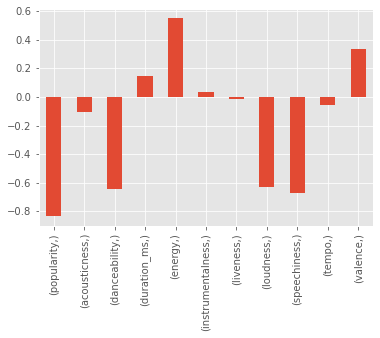

In [35]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model 
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=[dfPopRock.columns])
weights.plot(kind='bar')

In [44]:

# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = dfPopRock.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['genre'] = y[svm_clf.support_] 
dfPopRock['genre'] = y 
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7527 entries, 112725 to 226244
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        7527 non-null   int64  
 1   acousticness      7527 non-null   float64
 2   danceability      7527 non-null   float64
 3   duration_ms       7527 non-null   int64  
 4   energy            7527 non-null   float64
 5   instrumentalness  7527 non-null   float64
 6   liveness          7527 non-null   float64
 7   loudness          7527 non-null   float64
 8   speechiness       7527 non-null   float64
 9   tempo             7527 non-null   float64
 10  valence           7527 non-null   float64
 11  genre             7527 non-null   object 
dtypes: float64(9), int64(2), object(1)
memory usage: 764.5+ KB


<ipython-input-44-7152e879ed2a>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



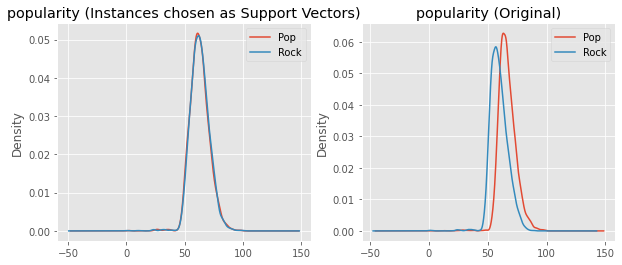

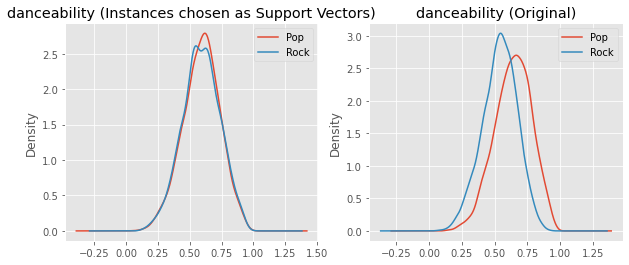

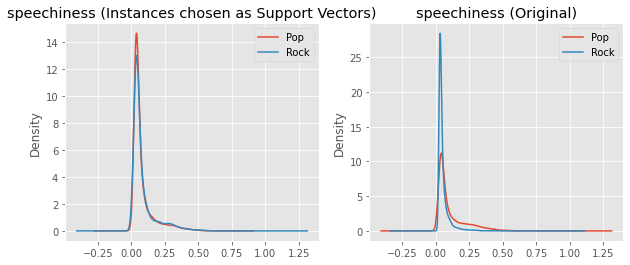

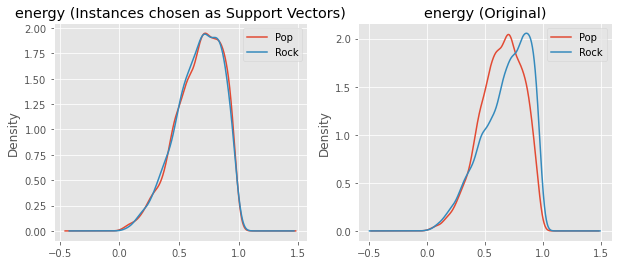

In [49]:
# now lets see the statistics of these attributes


# group the original data and the support vectors
df_grouped_support = df_support.groupby(['genre'])
df_grouped = dfPopRock.groupby(['genre'])

# plot KDE of Different variables
vars_to_plot = ['popularity','danceability','speechiness','energy']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Pop','Rock'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Pop','Rock'])
    plt.title(v+' (Original)')

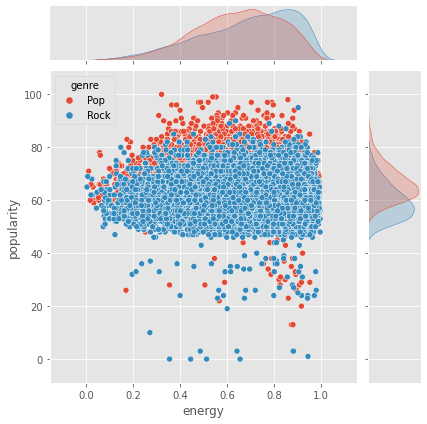

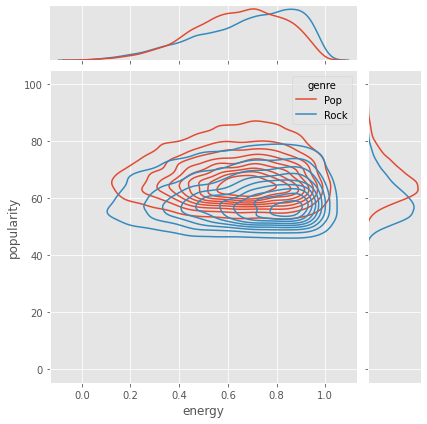

In [53]:
import seaborn as sns
sns.jointplot(data=dfPopRock, x="energy", y="popularity", hue="genre")
sns.jointplot(data=dfPopRock, x="energy", y="popularity", hue="genre", kind="kde")

## Models Comparison

### Advantages
#### Logistic Regression
* uses decision boundaries based on different weights of the data near an optimal point
* based on statistic properties of data

#### SVM
* uses "best" margin to separate classes and reduces risk of error on data
* used for data not regularly distributed or unknown distribution
* risk of overfitting is less than logistic regression
* works well with unstructured and semi-structured data
* based on geometrical properties of data

### Performance
In this particular comparison, we found that our logistic regression and SVM models performed similarly, with logistic regression at 77% accurate and SVM at 78% accurate.

Ideally, for performance is based on the number of features and number of training examples you have. Some rule of thumbs are from "Machine Learning" by Andrew NG's "Support Vector Machines - Using an SVM":

If the number of features (n) is large, relative to the number of training examples (m):
* Use logistic regression, or SVM without a kernal (i.e. a "linear kernel")
If n is small, and m is intermediate:
* Use SVM with Gaussian kernel
In n is small, and m is large:
* Create or add more features, then use **logistic regression** or **SVM w/o a kernel**


### Training Time/Efficiency
As we only utilized about 7,500 rows with 11 features, logistic regression ideally would be the simpler for training than SVMs, unless we used SVM without a kernel. However, since we do not have a large number of data rows or features, we ideally could have also used a Gaussian kernel for SVM instead of logistic regression.